In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
url='https://raw.githubusercontent.com/skathirmani/datasets/master/hotstar.allreviews_Sentiments.csv'
hotstar=pd.read_csv(url)
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [3]:
hotstar.shape

(5053, 13)

In [7]:
hotstar['Sentiment_Manual'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [4]:
#text column = Reviews, target=Sentiment_Manual

In [5]:
#reviews from google play store and twitter handle

# Exercises:

- split the data into train and test (0.20)
- Clean the text column and create dtm for training data
- build random forest (300 estimators), multinominal naive bayes & ada boost
- Report the accuracy score for all the above models using test data
- predict sentiment using vader package as well using the test data
- report accuracy
- compare sentiment analysis using text classification and VADER method
- Report the best technique


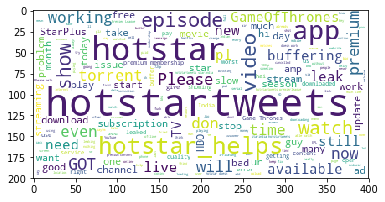

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
insincere_rows=hotstar[hotstar['Sentiment_Manual'] == 'Negative'] 
wc= WordCloud(background_color = 'white').generate(''.join(insincere_rows['Reviews']))
plt.imshow(wc)

In [7]:
from sklearn.model_selection import train_test_split
train ,validate  = train_test_split(hotstar, test_size=0.20, random_state=1)
train.shape ,validate.shape

((4042, 13), (1011, 13))

In [8]:
import nltk

def clean_sentence(doc,stopwords,stemmer):
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
     

def clean_documents(docs_raw):
    stopwords = nltk.corpus.stopwords.words('english')
    stemmer = nltk.stem.PorterStemmer()
    docs = docs_raw.str.lower().str.replace('[^a-z ]','')
    docs_clean = docs.apply(lambda doc: clean_sentence(doc,stopwords,stemmer))
    return docs_clean

train_docs_clean = clean_documents(train['Reviews'])
train_docs_clean.head()


3569                                       nice time stop
4920    rt idlebrainjeevi use amazon fire tv stick wat...
107     hotstarhelp hotstar order  paytm cash txn id w...
1939    check kya qusoor hai amla ka hotstar ore pyaar...
3165    sripriya mam miss bb today coz friend wed omg ...
Name: Reviews, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer().fit(train_docs_clean) #default min_df value is 1, since data is very small
dtm =vectorizer.transform(train_docs_clean)
dtm

<4042x5446 sparse matrix of type '<class 'numpy.int64'>'
	with 29704 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Rf=RandomForestClassifier(n_estimators=300).fit(dtm,train['Sentiment_Manual'])
validate_docs_clean = clean_documents(validate['Reviews'])
dtm_validate =vectorizer.transform(validate_docs_clean)
print(validate_docs_clean.head())

validate_pred = Rf.predict(dtm_validate)
from sklearn.metrics import accuracy_score
accuracy_score(validate['Sentiment_Manual'], validate_pred)

2289    jijanambiar nakuulmehta surbhichandna ypp star...
1777    buddhu episod get releas hotstar premium ist u...
804     sanreddi hotstarhelp hotstar dedic pl page abl...
2950                                            fabul app
2973                                                 amaz
Name: Reviews, dtype: object


0.7527200791295747

In [11]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB().fit(dtm,train['Sentiment_Manual'])
validate_pred=model_nb.predict(dtm_validate)
accuracy_score(validate['Sentiment_Manual'],validate_pred)

0.744807121661721

In [12]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier().fit(dtm,train['Sentiment_Manual'])
validate_pred=Ada.predict(dtm_validate)
accuracy_score(validate['Sentiment_Manual'],validate_pred)

0.6518298714144412

TF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer().fit(train_docs_clean)
dtm_train =tfidf_vectorizer.transform(train_docs_clean)
dtm_test =tfidf_vectorizer.transform(validate_docs_clean)

In [14]:
tfidf=pd.DataFrame(dtm_train.toarray(),columns=tfidf_vectorizer.get_feature_names())
tfidf.head()

,aa,aaaaaand,aaaaah,aabe,aacikelqcgv,aadat,aadhaar,aadhaarmem,aadhitamizhan,aag,...,zee,zeekannada,zeemoham,zeetv,zero,zindabad,ziuoubngwejxo,zmilap,znmd,zzzune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
tfidf.iloc[0].sort_values(ascending=False).head(10)

stop              0.686816
nice              0.515778
time              0.512111
god               0.000000
gng               0.000000
gni               0.000000
go                0.000000
goairwalirakhi    0.000000
goal              0.000000
goat              0.000000
Name: 0, dtype: float64

In [17]:
model_nb1=MultinomialNB().fit(dtm_train,train['Sentiment_Manual'])
test_pred_nb=model_nb1.predict(dtm_test)
accuracy_score(validate['Sentiment_Manual'],test_pred_nb)

0.7487636003956478

In [18]:
from sklearn.ensemble import AdaBoostClassifier
Ada1=AdaBoostClassifier().fit(dtm_train,train['Sentiment_Manual'])
test_Ada=Ada1.predict(dtm_test)
accuracy_score(validate['Sentiment_Manual'],test_Ada)

0.6528189910979229

In [19]:
from sklearn.ensemble import RandomForestClassifier
Rf1=RandomForestClassifier(n_estimators=300).fit(dtm_train,train['Sentiment_Manual'])
test_Rf1=Rf1.predict(dtm_test)
accuracy_score(validate['Sentiment_Manual'],test_Rf1)

0.76162215628091

In [20]:
from sklearn.metrics import classification_report
print(classification_report(validate['Sentiment_Manual'],test_Rf1))

              precision    recall  f1-score   support

    Negative       0.72      0.77      0.74       333
     Neutral       0.72      0.78      0.75       336
    Positive       0.86      0.74      0.79       342

   micro avg       0.76      0.76      0.76      1011
   macro avg       0.77      0.76      0.76      1011
weighted avg       0.77      0.76      0.76      1011



# Sentimental analysis

In [21]:
hotstar['Sentiment_Manual'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
calc_senti=SentimentIntensityAnalyzer()

In [23]:
validate['Reviews'].shape

(1011,)

C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


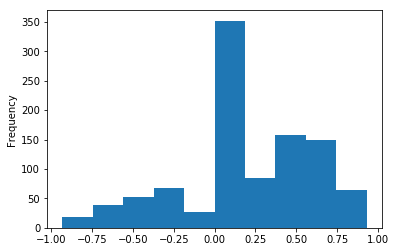

In [38]:
%matplotlib inline
validate['Sentiment_compound']=validate['Reviews'].apply(lambda v:calc_senti.polarity_scores(v)['compound'])
validate['Sentiment_compound'].plot.hist()

In [45]:
def get_sentiment(compound):
    if compound>0:
        return 'Positive'
    elif compound ==0:
        return 'Neutral'
    else:
        return 'Negative'
    return
    #return 1 if compound >0 else 0
validate['sentiment_vader']=validate['Sentiment_compound'].apply(get_sentiment)
validate[['Sentiment_Manual','Sentiment_compound','sentiment_vader']].head(10)

C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Sentiment_Manual,Sentiment_compound,sentiment_vader
2289,Neutral,0.0000,Neutral
1777,Neutral,0.0000,Neutral
804,Negative,0.4588,Positive
2950,Positive,0.5267,Positive
2973,Positive,0.5859,Positive
1513,Neutral,0.3612,Positive
496,Neutral,0.0000,Neutral
3889,Positive,0.3716,Positive
2197,Neutral,-0.2732,Negative
2427,Positive,0.0000,Neutral


In [46]:
accuracy_score(validate['Sentiment_Manual'],validate['sentiment_vader'])

0.5420375865479723

In [47]:
#accuracy is less because regional language written in enlish

In [48]:
#Hence classifier does better when with regional languages

# sentiment trending analysis

In [49]:
def get_sentiment(review,sentiment_analyser):
    compound=sentiment_analyser.polarity_scores(review)['compound']
    if compound>0.2:
        return 'Neutral'
    elif compound < -0.2:
        return 'Negative'
    else:
        return 'Positive'
    return
sentiment_analyser=SentimentIntensityAnalyzer()
hotstar['sentiment_vader']=hotstar['Reviews'].apply(lambda v:get_sentiment(v,sentiment_analyser))

In [51]:
hotstar['Created_Date'].unique()

array(['8/10/2017', '8/11/2017', '8/12/2017', '8/5/2017', '8/7/2017',
       '8/8/2017', '8/6/2017', '8/13/2017', '8/9/2017', '8/4/2017'],
      dtype=object)

In [53]:
import matplotlib.pyplot as plt
hotstar.groupby(['Created_Date','sentiment_vader']).size()

Created_Date  sentiment_vader
8/10/2017     Negative           154
              Neutral            506
              Positive           369
8/11/2017     Negative           126
              Neutral            549
              Positive           381
8/12/2017     Negative            75
              Neutral            256
              Positive           237
8/13/2017     Negative            10
              Neutral             58
              Positive            62
8/4/2017      Negative            90
              Neutral            116
              Positive           121
8/5/2017      Negative           114
              Neutral            115
              Positive           167
8/6/2017      Negative            57
              Neutral             97
              Positive           133
8/7/2017      Negative            83
              Neutral            128
              Positive           186
8/8/2017      Negative            30
              Neutral             80
        

In [60]:
summary=hotstar.groupby(['Created_Date','sentiment_vader']).size().reset_index()  #to convert to dataframe
summary.head()

,Created_Date,sentiment_vader,0
0,8/10/2017,Negative,154
1,8/10/2017,Neutral,506
2,8/10/2017,Positive,369
3,8/11/2017,Negative,126
4,8/11/2017,Neutral,549


In [61]:
summary=summary.rename(columns={0:'count'})

In [62]:
summary.head()

,Created_Date,sentiment_vader,count
0,8/10/2017,Negative,154
1,8/10/2017,Neutral,506
2,8/10/2017,Positive,369
3,8/11/2017,Negative,126
4,8/11/2017,Neutral,549


# multi line chart

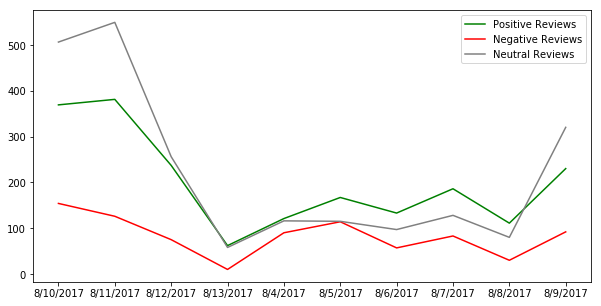

In [71]:
pos_counts=summary[summary['sentiment_vader']=='Positive']
neg_counts=summary[summary['sentiment_vader']=='Negative']
neu_counts=summary[summary['sentiment_vader']=='Neutral']
plt.figure(figsize=(10,5))
plt.plot(pos_counts['Created_Date'],pos_counts['count'],color='green')
plt.plot(neg_counts['Created_Date'],neg_counts['count'],color='red')
plt.plot(neu_counts['Created_Date'],neu_counts['count'],color='grey')
plt.legend(['Positive Reviews','Negative Reviews','Neutral Reviews'])
plt.xlabel('Date')
plt.ylabel('count')
plt.title('')